In [47]:
import numpy as np
from matplotlib import pyplot as plt

from copy import deepcopy
%matplotlib inline

In [3]:
infile = '/Users/scollis/Downloads/apple_health_export/electrocardiograms/ecg_2020-02-16.csv'

# Open file    
fileHandler = open (infile, "r")
# Get list of all lines in file
listOfLines = fileHandler.readlines()
# Close file 
fileHandler.close()


In [68]:
listOfLines[2:-1]

['Recorded Date,2020-02-16 11:56:41 -0600\n',
 'Classification,Sinus Rhythm\n',
 'Symptoms,\n',
 'Software Version,1.51\n',
 'Device,"Watch4,2"\n',
 'Sample Rate,510.844 hertz\n',
 '\n',
 '\n',
 'Lead,Lead I\n',
 'Unit,µV\n',
 '\n',
 '51.845\n',
 '27.614\n',
 '5.705\n',
 '-13.662\n',
 '-30.348\n',
 '-44.239\n',
 '-55.257\n',
 '-63.439\n',
 '-68.929\n',
 '-71.968\n',
 '-72.873\n',
 '-71.928\n',
 '-69.401\n',
 '-65.599\n',
 '-60.861\n',
 '-55.585\n',
 '-50.159\n',
 '-44.876\n',
 '-39.941\n',
 '-35.515\n',
 '-31.728\n',
 '-28.697\n',
 '-26.51\n',
 '-25.172\n',
 '-24.627\n',
 '-24.782\n',
 '-25.524\n',
 '-26.764\n',
 '-28.404\n',
 '-30.317\n',
 '-32.344\n',
 '-34.302\n',
 '-36.031\n',
 '-37.43\n',
 '-38.44\n',
 '-39.02\n',
 '-39.137\n',
 '-38.766\n',
 '-37.901\n',
 '-36.578\n',
 '-34.848\n',
 '-32.763\n',
 '-30.365\n',
 '-27.688\n',
 '-24.776\n',
 '-21.686\n',
 '-18.486\n',
 '-15.249\n',
 '-12.025\n',
 '-8.845\n',
 '-5.728\n',
 '-2.687\n',
 '0.271\n',
 '3.141\n',
 '5.933\n',
 '8.668\n',
 '

In [17]:
srate = float(listOfLines[7].split(',')[1].split(' ')[0])

In [18]:
srate

510.844

In [28]:
microvolts_text = listOfLines[13:-1]
microvolts = np.array([float(thisel) for thisel in microvolts_text])

In [31]:
period = 1.0/srate
time_array = np.linspace(0, len(microvolts)*period, len(microvolts))

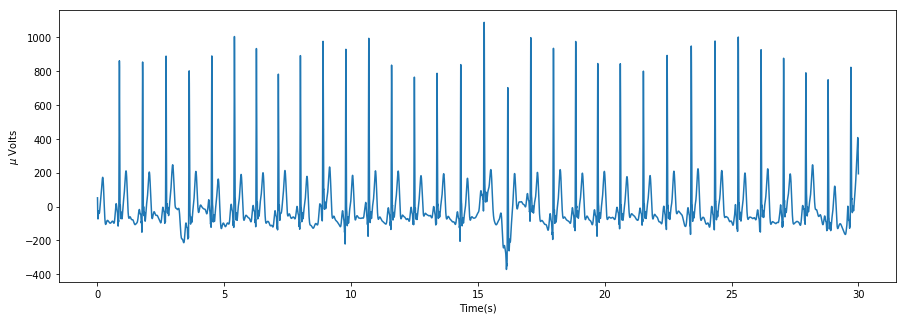

In [36]:
myf = plt.figure(figsize=[15,5])
plt.plot(time_array, microvolts)
plt.xlabel('Time(s)')
plt.ylabel(r'$\mu{}$ Volts')
plt.savefig('/users/scollis/ecg.png')

In [38]:
efft = np.fft.fft(microvolts)

In [39]:
efft

array([-4974.441        +0.j        , -5003.98458075-1914.06881941j,
       -4981.38367512-4021.33602892j, ..., -5041.84096552+6192.6865032j ,
       -4981.38367512+4021.33602892j, -5003.98458075+1914.06881941j])

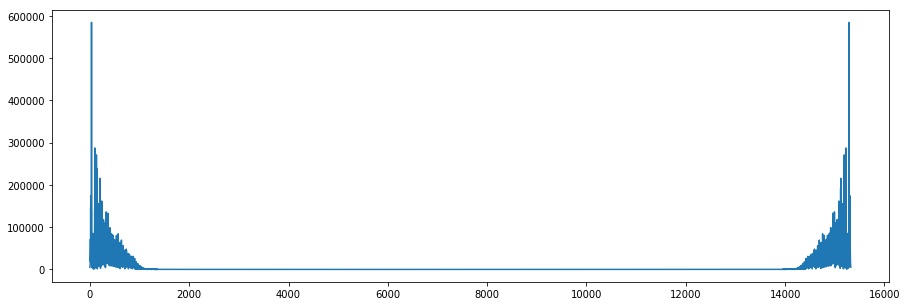

In [43]:
myf = plt.figure(figsize=[15,5])
plt.plot(abs(efft))

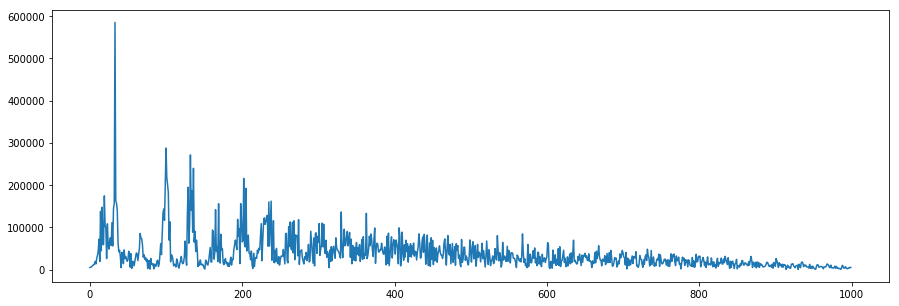

In [67]:
myf = plt.figure(figsize=[15,5])
plt.plot(abs(efft)[0:1000])
plt.savefig('/Users/scollis/ffte.png')

In [62]:
modfft = deepcopy(efft)
cut = 100
modfft[0:cut] = 0.
modfft[-cut:-1] = 0.

In [63]:
fecg = np.fft.ifft(modfft)

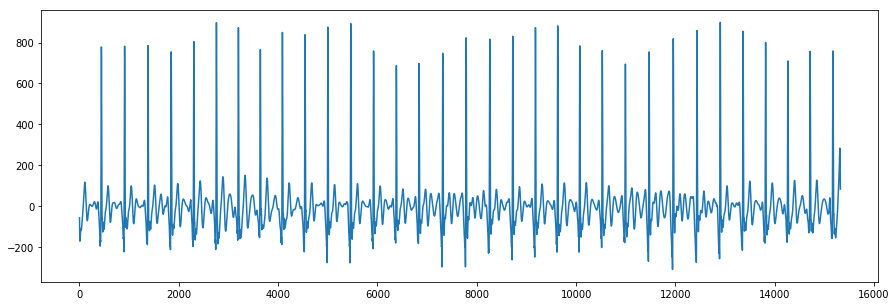

In [66]:
myf = plt.figure(figsize=[15,5])
plt.plot(np.real(fecg))
#plt.plot(microvolts)
plt.savefig('/Users/scollis/lpf.png')